<a href="https://colab.research.google.com/github/fahadpro01/Product/blob/master/Video_game_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets check the versions of the package and import

In [5]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
1.1.4
3.2.2
0.11.0
0.22.2.post1


lets import again

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

loading the data set using pandas

In [16]:

games = pandas.read_csv("games.csv")

lets make a column in games and how much datas are in the file

In [17]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


making the histogram of ratings in the average rating column

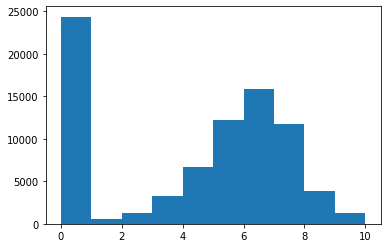

In [34]:
plt.hist(games["average_rating"])
plt.show()

print the games with 0score

In [22]:
print(games[games["average_rating"]==0].iloc[0])

id                                579
type                        boardgame
name                    Field of Fire
yearpublished                    2002
minplayers                          2
maxplayers                          0
playingtime                         0
minplaytime                         0
maxplaytime                         0
minage                             12
users_rated                         0
average_rating                      0
bayes_average_rating                0
total_owners                        2
total_traders                       0
total_wanters                       0
total_wishers                       1
total_comments                      0
total_weights                       0
average_weight                      0
Name: 13068, dtype: object


print first row  game score greater than 0

In [23]:
print(games[games["average_rating"]>0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [35]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


Lets great a corealtion matrix

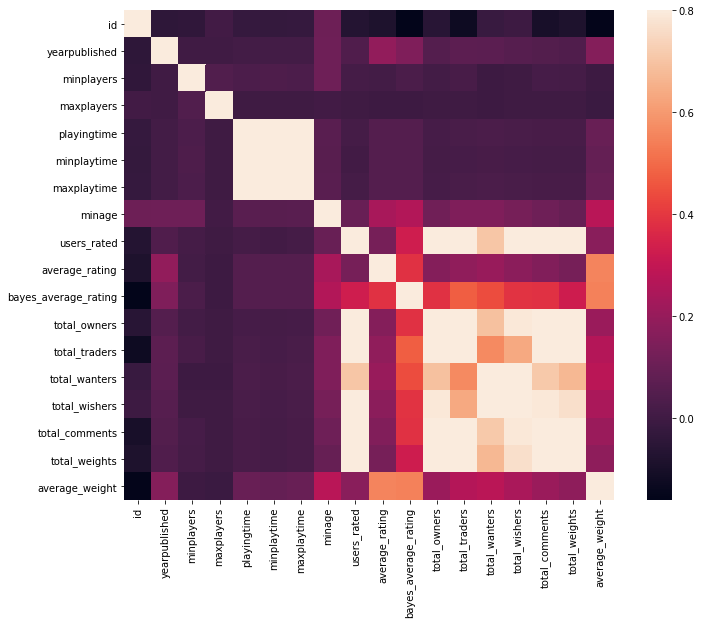

In [38]:
corrmat = games.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

get the all the colums in data frame

In [56]:
columns = games.columns.tolist()
columns =[c for c in columns if c not in ["bayes_averating_rating", "average_rating", "type", "name", "id"]]
target ="average_rating"

In [ ]:
genearte training and test the datset

In [57]:
from sklearn.model_selection import train_test_split
train = games.sample(frac=0.8,random_state=1)
test = games.loc[~games.index.isin(train.index)]
print(train.shape)
print(test.shape)

(65050, 20)
(16262, 20)


import linear regression mode


In [64]:
# Importing LinearRegression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initializing Model Class
LR = LinearRegression()

# Fitting the Training Data with the Model
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
#geneating the predication
predictions=LR.predict(test[columns])
#test vs actual value
mean_squared_error(predictions,test[target])

2.078819032629323

In [68]:
#import random forest
from sklearn.ensemble import RandomForestRegressor
#initaial the model
RFR = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
#fit the data
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [69]:
predications = RFR.predict(test[columns])
mean_squared_error(predictions,test[target])

2.078819032629323

In [70]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [72]:

rating_LR=LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR=RFR.predict(test[columns].iloc[0].values.reshape(1,-1))
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [73]:
test[target].iloc[0]

8.07933